<a href="https://colab.research.google.com/github/SivaChandranR07/Neural-Network-Regression-Model/blob/main/DL_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('/content/dataset1.csv')
X = dataset1.iloc[:, 1:].values
y = dataset1.iloc[:, 0].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
# Name: Siva Chandran R
# Register Number: 212222240099
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Include your code here
        # Changed the input size of the first layer to 784 to match the input data
        self.fc1 = nn.Linear(1, 4)
        self.fc2 = nn.Linear(4, 7)
        self.fc3 = nn.Linear(7, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [ ]:
# Name: Siva Chandran R
# Register Number: 212222240099
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()
        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 0.000007
Epoch [200/2000], Loss: 0.001474
Epoch [400/2000], Loss: 0.000479
Epoch [600/2000], Loss: 0.001012
Epoch [800/2000], Loss: 0.000873
Epoch [1000/2000], Loss: 0.000434
Epoch [1200/2000], Loss: 0.001213
Epoch [1400/2000], Loss: 0.000748
Epoch [1600/2000], Loss: 0.000458
Epoch [1800/2000], Loss: 0.001323


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 0.007172


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

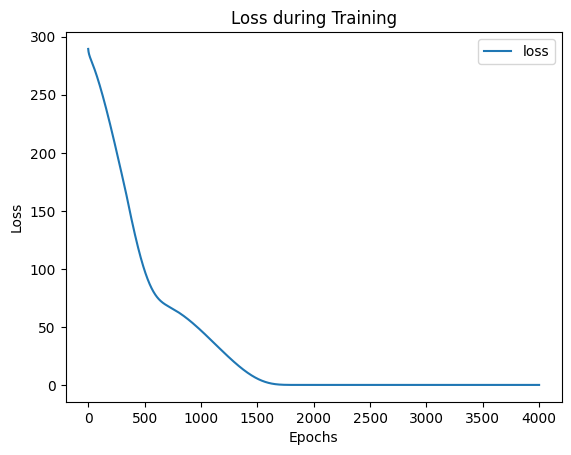

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[7]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 0.8922529220581055


In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 1.0524669885635376


In [ ]:
df = pd.read_csv('/content/dataset1.csv')
print(df)

    Input  Output
0       1      11
1       2      21
2       3      31
3       4      41
4       5      51
5       6      61
6       7      71
7       8      81
8       9      91
9      11     111
10     13     131
11     14     141
12     15     151
13     17     171
14     24     241
15     28     281
16     30     301
17     33     331
18     35     351
